In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coffee = pd.read_csv("coffee.csv")
coffee

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/6/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/6/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/6/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/6/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [3]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [4]:
grp_coffee = coffee.groupby("product_category")

for grp, grp_info in grp_coffee:
    print(grp_info)
    break

        transaction_id transaction_date transaction_time  transaction_qty  \
5                    6         1/1/2023          7:22:41                1   
16                  17         1/1/2023          7:59:58                1   
22                  23         1/1/2023          8:24:26                1   
26                  27         1/1/2023          8:33:08                1   
28                  29         1/1/2023          8:35:03                1   
...                ...              ...              ...              ...   
149063          149404        30/6/2023         18:49:29                1   
149093          149434        30/6/2023         19:39:19                1   
149096          149437        30/6/2023         19:44:46                2   
149101          149442        30/6/2023         19:46:28                1   
149108          149449        30/6/2023         19:57:49                1   

        store_id   store_location  product_id  unit_price product_category 

In [6]:
# Assuming 'coffee' DataFrame is already created
grp_coffee = coffee.groupby(['product_category', 'product_type'])

cat_list = []

for (category, product), grp_info in grp_coffee:
    cat_dict = {}
    
    cat_dict['Category'] = category
    cat_dict['Product'] = product
    cat_dict['Total_Order'] = grp_info['transaction_qty'].sum()
    
    cat_list.append(cat_dict)

# Convert the list of dictionaries to a DataFrame
cat_df = pd.DataFrame(cat_list)

# Display the resulting DataFrame
cat_df

,Category,Product,Total_Order
0,Bakery,Biscotti,5788
1,Bakery,Pastry,6961
2,Bakery,Scone,10465
3,Branded,Clothing,221
4,Branded,Housewares,555
5,Coffee,Barista Espresso,24943
6,Coffee,Drip coffee,12891
7,Coffee,Gourmet brewed coffee,25973
8,Coffee,Organic brewed coffee,13012
9,Coffee,Premium brewed coffee,12431


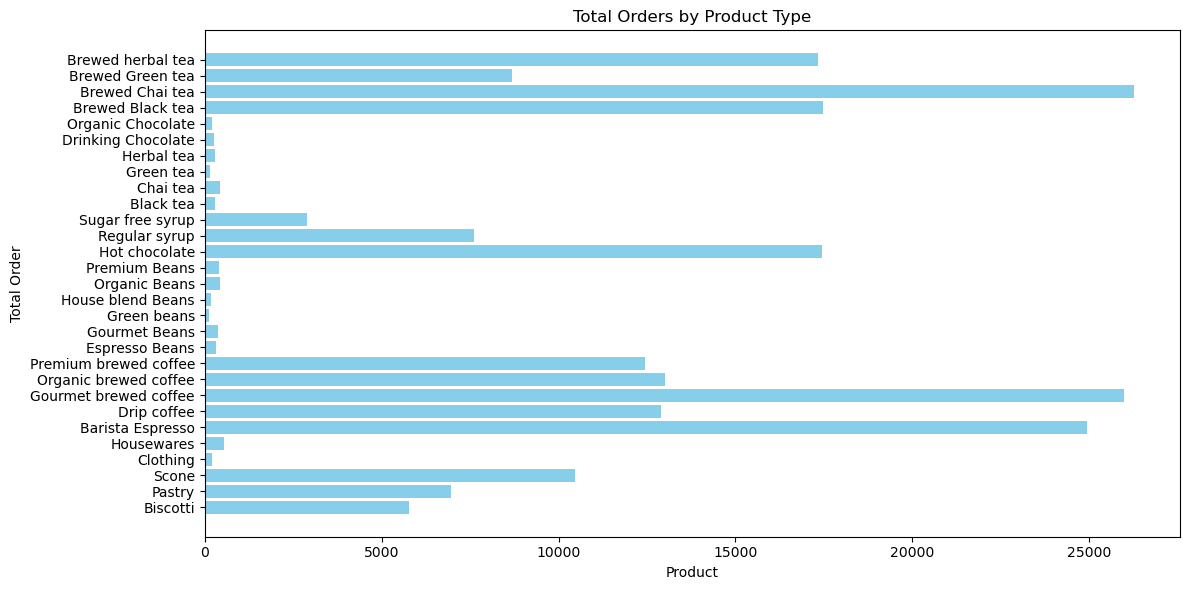

In [9]:
# Create a bar plot using matplotlib
plt.figure(figsize=(12, 6))
plt.barh(cat_df['Product'], cat_df['Total_Order'], color='skyblue')

plt.xlabel('Product')
plt.ylabel('Total Order')
plt.title('Total Orders by Product Type')

# plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot to a file
plt.savefig('total_orders_by_product.png', format='png')

# Show the plot
plt.show()


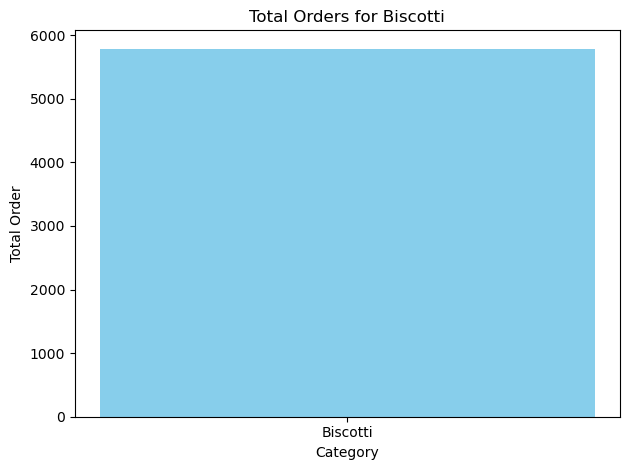

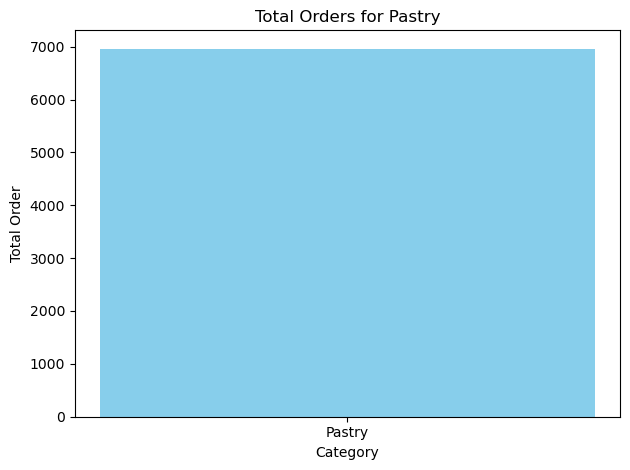

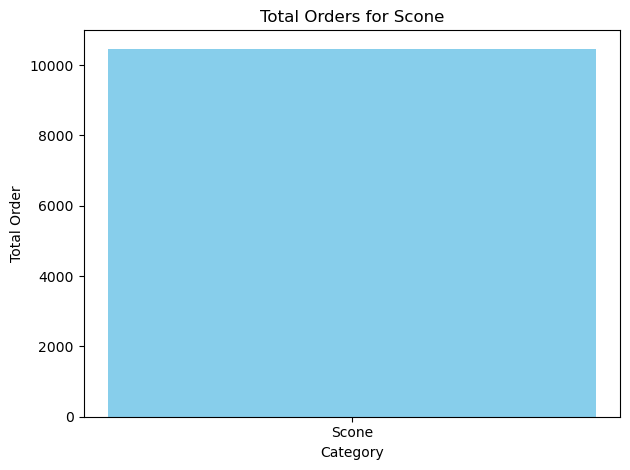

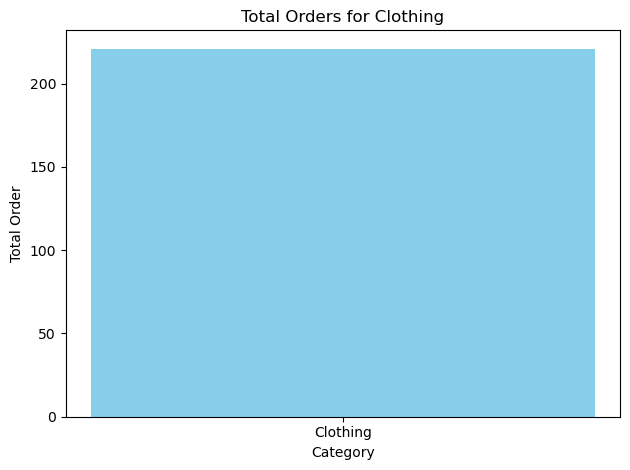

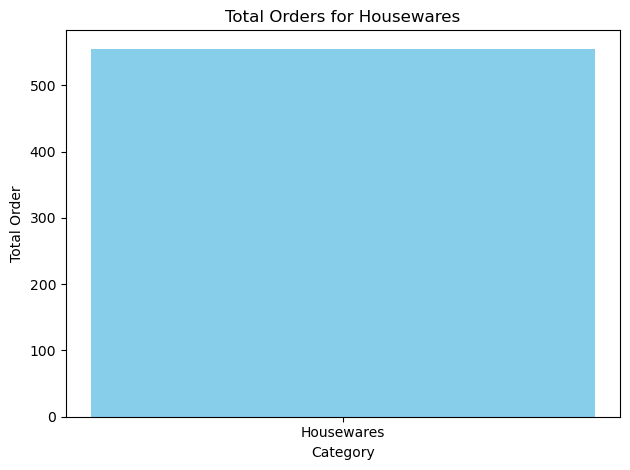

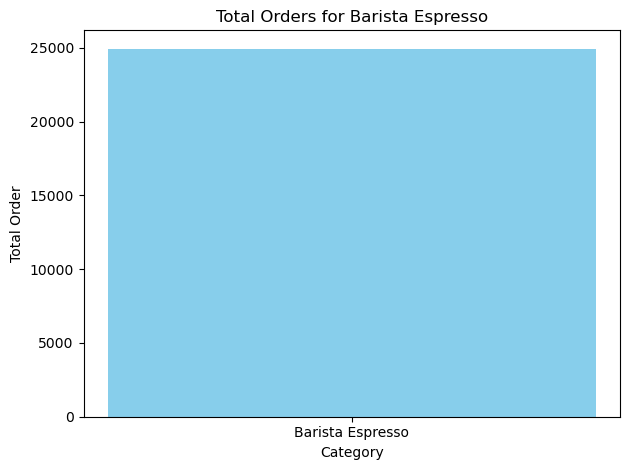

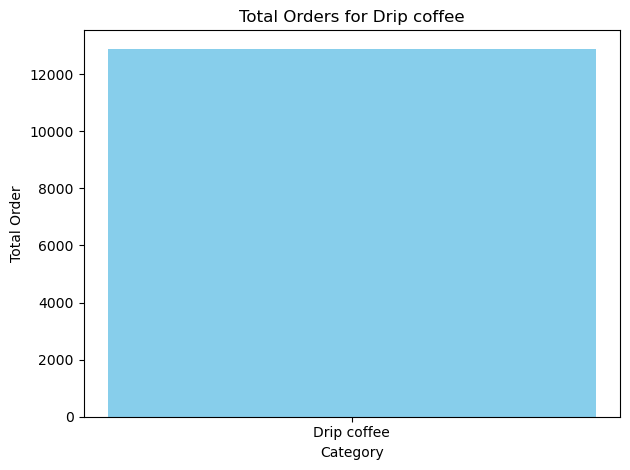

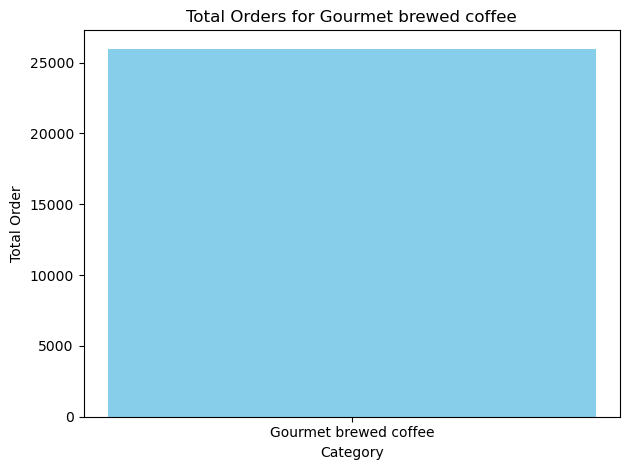

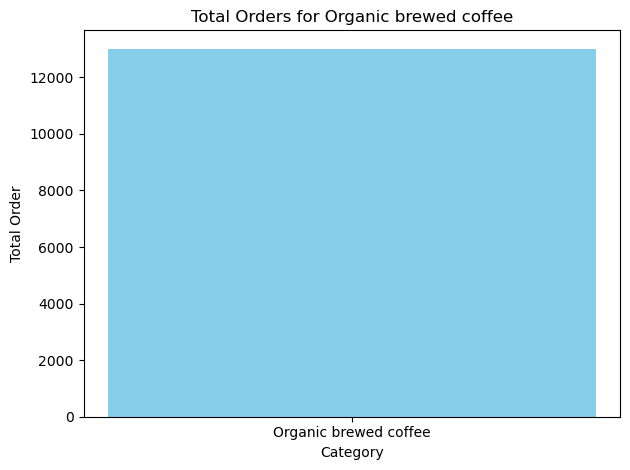

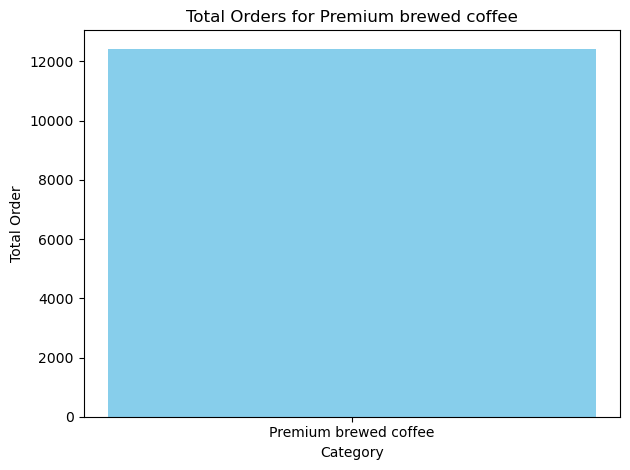

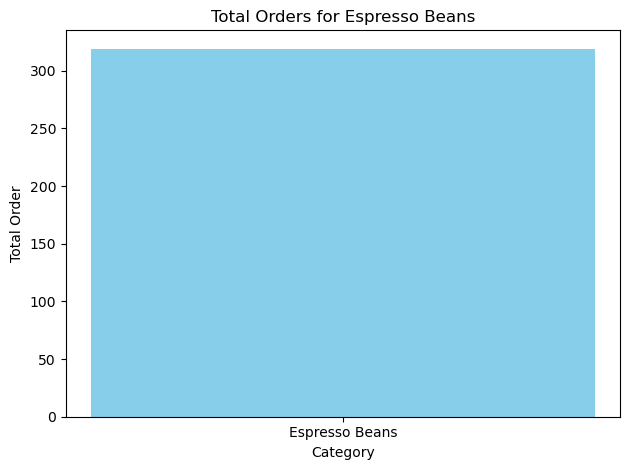

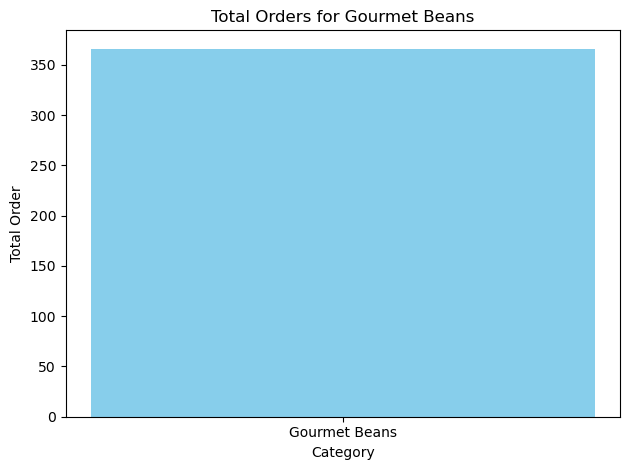

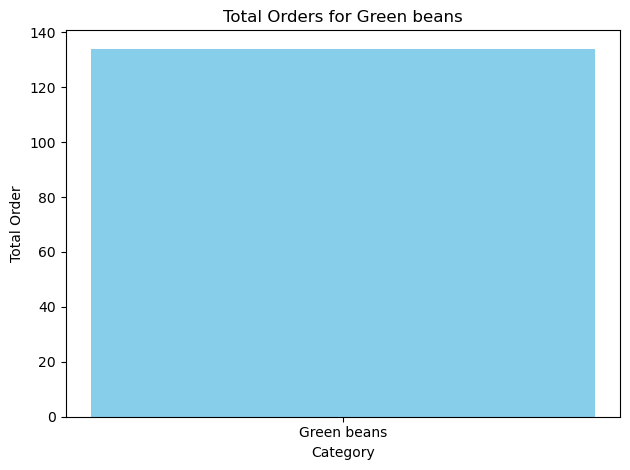

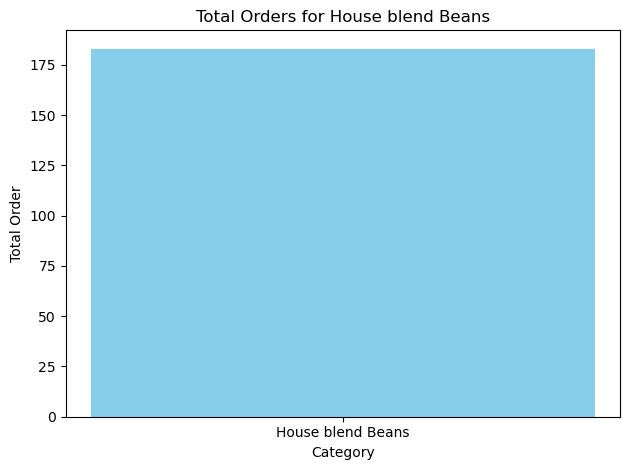

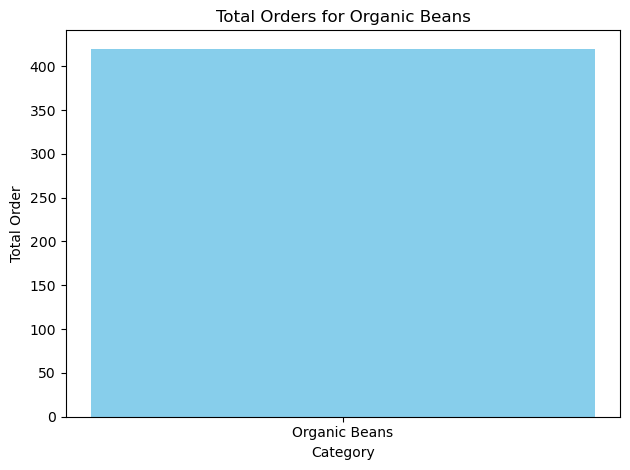

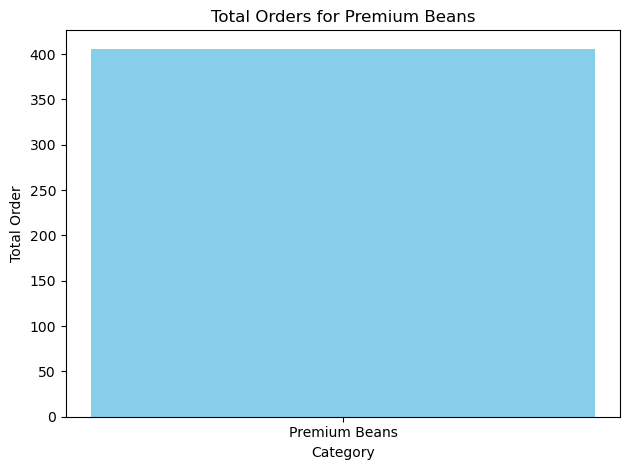

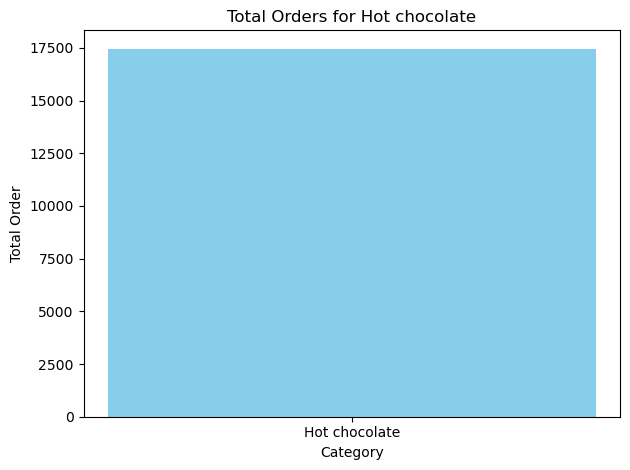

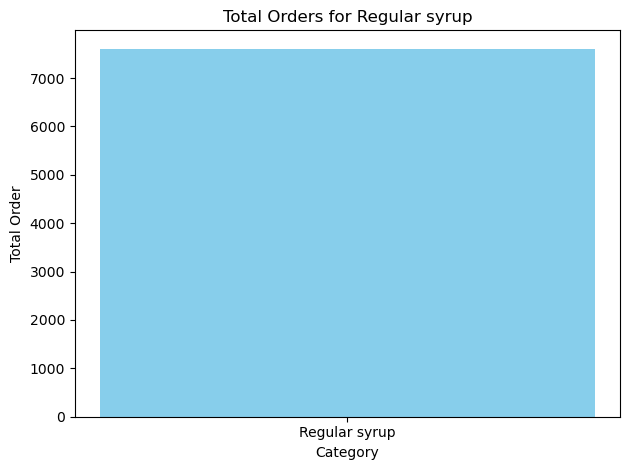

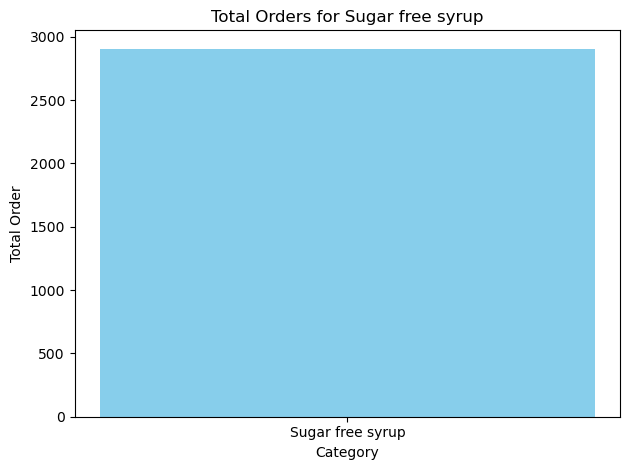

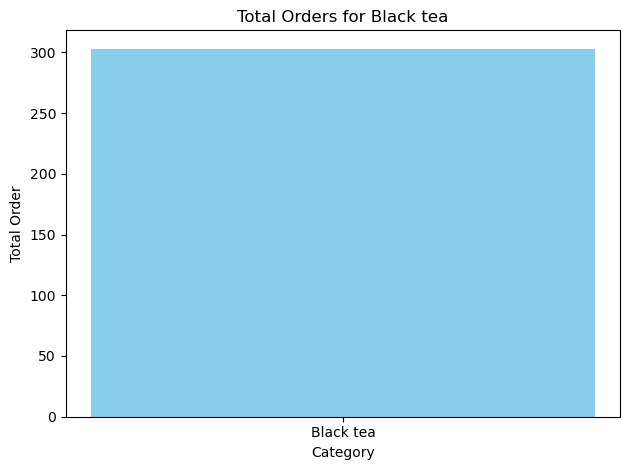

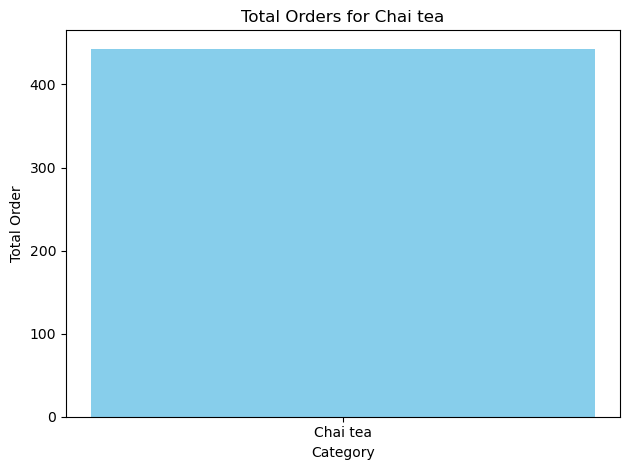

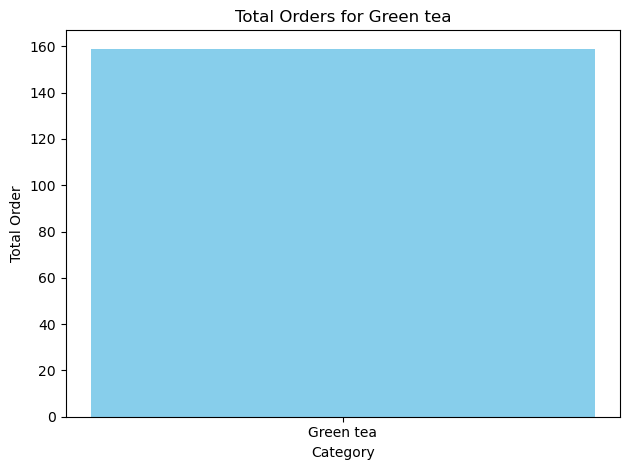

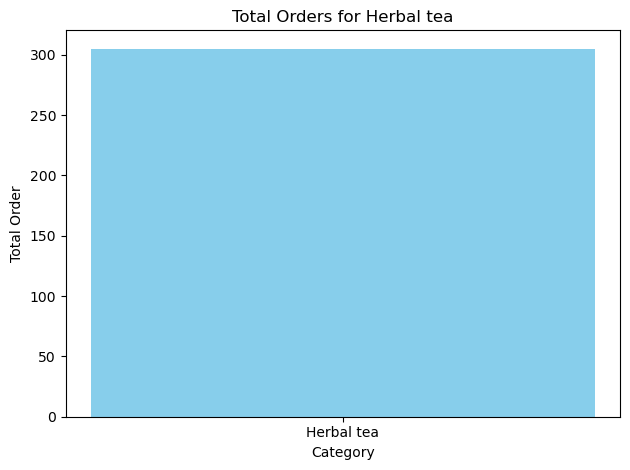

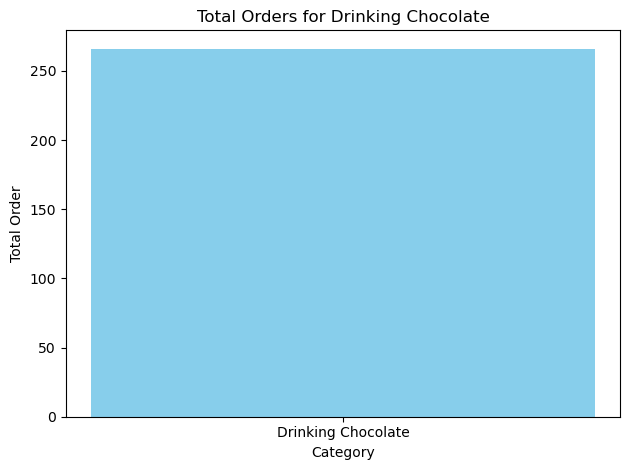

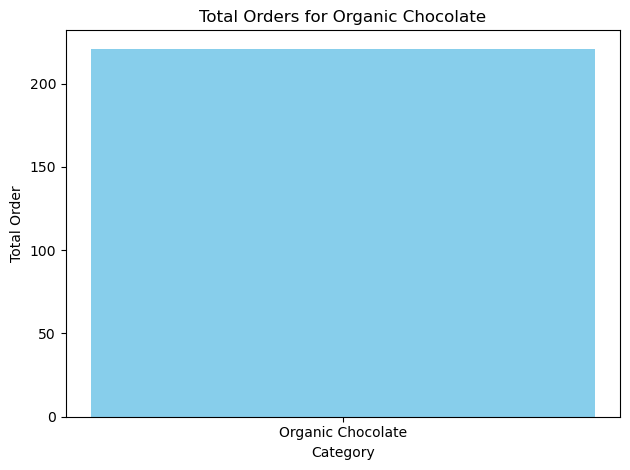

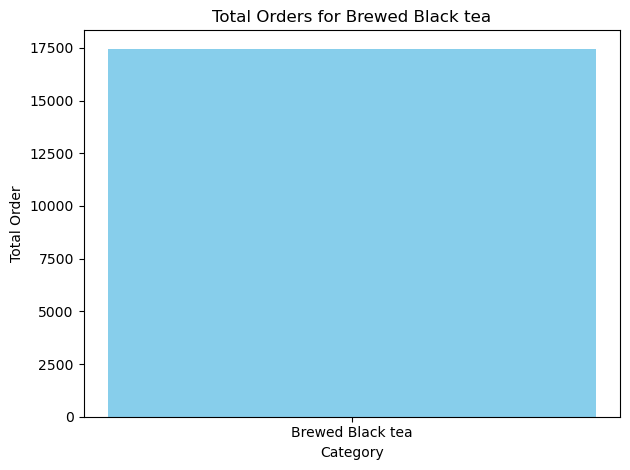

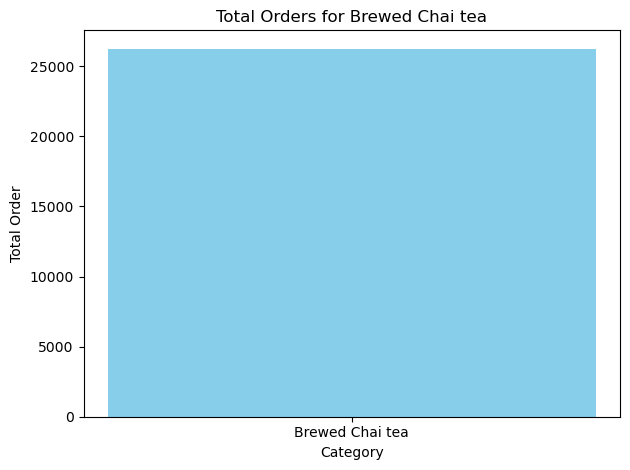

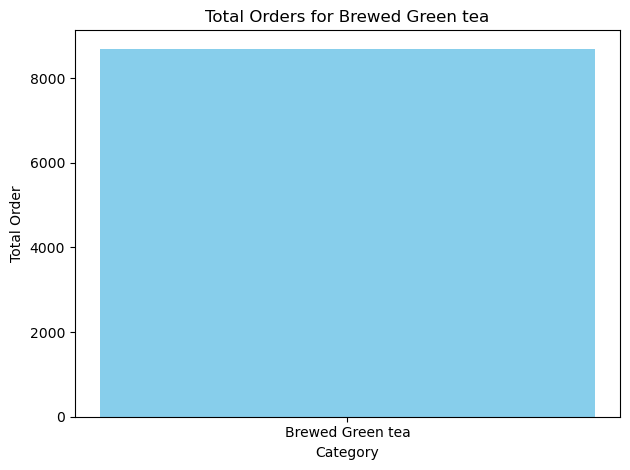

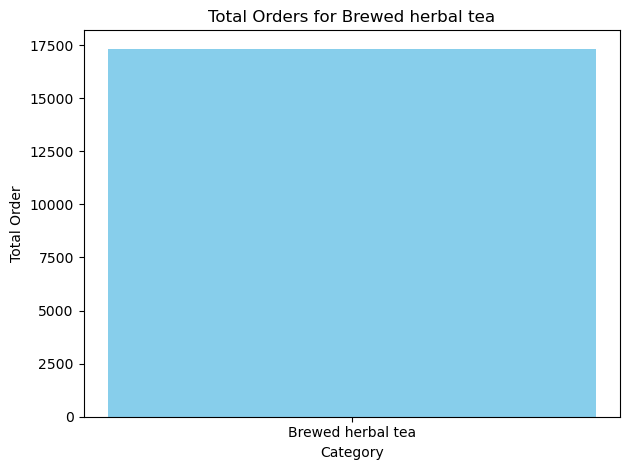

In [8]:
products = cat_df['Product'].unique()
for product in products:
    # Filter data for the current product
    product_data = cat_df[cat_df['Product'] == product]
    
    plt.figure()
    plt.bar(product_data['Product'], product_data['Total_Order'], color='skyblue')
    
    plt.xlabel('Category')
    plt.ylabel('Total Order')
    plt.title(f'Total Orders for {product}')
    plt.tight_layout()
    
    # Save or show the plot
    plt.show()
    # plt.savefig(f'{product}_orders.png')  # Uncomment to save plots as images